In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

import catboost as cat
from catboost import CatBoostRegressor

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Using Grid Search to find best parameters

In [12]:
catmodel1 = cat.CatBoostRegressor()

In [18]:
params_grid = {'iterations': [300, 400, 500]} 

In [19]:
grid_search_cat1 = GridSearchCV(catmodel1,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [20]:
grid_search_cat1.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.8min finished


0:	learn: 1.5678516	total: 43.9ms	remaining: 21.9s
1:	learn: 1.5436156	total: 79.6ms	remaining: 19.8s
2:	learn: 1.5201812	total: 109ms	remaining: 18.1s
3:	learn: 1.4977971	total: 151ms	remaining: 18.7s
4:	learn: 1.4764203	total: 183ms	remaining: 18.1s
5:	learn: 1.4559927	total: 211ms	remaining: 17.4s
6:	learn: 1.4365942	total: 251ms	remaining: 17.7s
7:	learn: 1.4178840	total: 285ms	remaining: 17.5s
8:	learn: 1.3999700	total: 327ms	remaining: 17.9s
9:	learn: 1.3830296	total: 358ms	remaining: 17.6s
10:	learn: 1.3668033	total: 391ms	remaining: 17.4s
11:	learn: 1.3516948	total: 418ms	remaining: 17s
12:	learn: 1.3369732	total: 465ms	remaining: 17.4s
13:	learn: 1.3229740	total: 510ms	remaining: 17.7s
14:	learn: 1.3096310	total: 545ms	remaining: 17.6s
15:	learn: 1.2970127	total: 575ms	remaining: 17.4s
16:	learn: 1.2848963	total: 612ms	remaining: 17.4s
17:	learn: 1.2733337	total: 643ms	remaining: 17.2s
18:	learn: 1.2624258	total: 691ms	remaining: 17.5s
19:	learn: 1.2520542	total: 736ms	remaini

165:	learn: 1.0487894	total: 6.2s	remaining: 12.5s
166:	learn: 1.0487445	total: 6.24s	remaining: 12.4s
167:	learn: 1.0486957	total: 6.29s	remaining: 12.4s
168:	learn: 1.0486250	total: 6.33s	remaining: 12.4s
169:	learn: 1.0485746	total: 6.38s	remaining: 12.4s
170:	learn: 1.0484031	total: 6.42s	remaining: 12.3s
171:	learn: 1.0483815	total: 6.46s	remaining: 12.3s
172:	learn: 1.0483329	total: 6.48s	remaining: 12.3s
173:	learn: 1.0482823	total: 6.54s	remaining: 12.2s
174:	learn: 1.0481067	total: 6.59s	remaining: 12.2s
175:	learn: 1.0479564	total: 6.66s	remaining: 12.3s
176:	learn: 1.0479092	total: 6.71s	remaining: 12.3s
177:	learn: 1.0478370	total: 6.75s	remaining: 12.2s
178:	learn: 1.0477660	total: 6.79s	remaining: 12.2s
179:	learn: 1.0477053	total: 6.84s	remaining: 12.2s
180:	learn: 1.0476650	total: 6.88s	remaining: 12.1s
181:	learn: 1.0476130	total: 6.92s	remaining: 12.1s
182:	learn: 1.0475498	total: 6.95s	remaining: 12s
183:	learn: 1.0475226	total: 6.99s	remaining: 12s
184:	learn: 1.047

327:	learn: 1.0423095	total: 12.5s	remaining: 6.53s
328:	learn: 1.0423067	total: 12.5s	remaining: 6.49s
329:	learn: 1.0422635	total: 12.5s	remaining: 6.45s
330:	learn: 1.0422462	total: 12.6s	remaining: 6.41s
331:	learn: 1.0422220	total: 12.6s	remaining: 6.37s
332:	learn: 1.0421989	total: 12.6s	remaining: 6.34s
333:	learn: 1.0421809	total: 12.7s	remaining: 6.3s
334:	learn: 1.0421638	total: 12.7s	remaining: 6.26s
335:	learn: 1.0421496	total: 12.7s	remaining: 6.22s
336:	learn: 1.0421349	total: 12.8s	remaining: 6.18s
337:	learn: 1.0421106	total: 12.8s	remaining: 6.15s
338:	learn: 1.0420966	total: 12.9s	remaining: 6.11s
339:	learn: 1.0420727	total: 12.9s	remaining: 6.07s
340:	learn: 1.0420560	total: 12.9s	remaining: 6.03s
341:	learn: 1.0420345	total: 13s	remaining: 5.99s
342:	learn: 1.0420211	total: 13s	remaining: 5.95s
343:	learn: 1.0420019	total: 13s	remaining: 5.91s
344:	learn: 1.0419705	total: 13.1s	remaining: 5.87s
345:	learn: 1.0419532	total: 13.1s	remaining: 5.83s
346:	learn: 1.04194

486:	learn: 1.0396777	total: 18.6s	remaining: 496ms
487:	learn: 1.0396647	total: 18.6s	remaining: 458ms
488:	learn: 1.0396566	total: 18.7s	remaining: 421ms
489:	learn: 1.0396508	total: 18.7s	remaining: 382ms
490:	learn: 1.0396332	total: 18.8s	remaining: 344ms
491:	learn: 1.0396282	total: 18.8s	remaining: 306ms
492:	learn: 1.0396205	total: 18.9s	remaining: 268ms
493:	learn: 1.0396126	total: 18.9s	remaining: 229ms
494:	learn: 1.0395716	total: 18.9s	remaining: 191ms
495:	learn: 1.0395640	total: 19s	remaining: 153ms
496:	learn: 1.0395537	total: 19s	remaining: 115ms
497:	learn: 1.0395439	total: 19.1s	remaining: 76.6ms
498:	learn: 1.0395308	total: 19.1s	remaining: 38.3ms
499:	learn: 1.0395161	total: 19.1s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x000002082D40F208>,
             iid='warn', n_jobs=-1, param_grid={'iterations': [300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [21]:
grid_search_cat1.best_params_

{'iterations': 500}

**---------------------------------------------------------------------------------------------------------------**

In [22]:
catmodel2 = cat.CatBoostRegressor(iterations=500)

In [23]:
params_grid = {'learning_rate': [0.01, 0.03, 0.05]}

In [24]:
grid_search_cat2 = GridSearchCV(catmodel2,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [25]:
grid_search_cat2.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.9min finished


0:	learn: 1.5509943	total: 29ms	remaining: 14.5s
1:	learn: 1.5117822	total: 58.9ms	remaining: 14.7s
2:	learn: 1.4752692	total: 82.6ms	remaining: 13.7s
3:	learn: 1.4414750	total: 106ms	remaining: 13.2s
4:	learn: 1.4102169	total: 136ms	remaining: 13.5s
5:	learn: 1.3813549	total: 160ms	remaining: 13.2s
6:	learn: 1.3547837	total: 190ms	remaining: 13.4s
7:	learn: 1.3300807	total: 213ms	remaining: 13.1s
8:	learn: 1.3072093	total: 252ms	remaining: 13.7s
9:	learn: 1.2863690	total: 277ms	remaining: 13.6s
10:	learn: 1.2670739	total: 307ms	remaining: 13.7s
11:	learn: 1.2499066	total: 332ms	remaining: 13.5s
12:	learn: 1.2336491	total: 360ms	remaining: 13.5s
13:	learn: 1.2187946	total: 385ms	remaining: 13.4s
14:	learn: 1.2055063	total: 419ms	remaining: 13.6s
15:	learn: 1.1933268	total: 451ms	remaining: 13.7s
16:	learn: 1.1818431	total: 476ms	remaining: 13.5s
17:	learn: 1.1711682	total: 506ms	remaining: 13.6s
18:	learn: 1.1616642	total: 530ms	remaining: 13.4s
19:	learn: 1.1527708	total: 558ms	remain

165:	learn: 1.0438101	total: 4.66s	remaining: 9.37s
166:	learn: 1.0436634	total: 4.68s	remaining: 9.34s
167:	learn: 1.0436261	total: 4.71s	remaining: 9.32s
168:	learn: 1.0435977	total: 4.74s	remaining: 9.28s
169:	learn: 1.0435419	total: 4.77s	remaining: 9.26s
170:	learn: 1.0434759	total: 4.79s	remaining: 9.22s
171:	learn: 1.0433115	total: 4.83s	remaining: 9.2s
172:	learn: 1.0432487	total: 4.85s	remaining: 9.17s
173:	learn: 1.0431370	total: 4.88s	remaining: 9.14s
174:	learn: 1.0431036	total: 4.91s	remaining: 9.11s
175:	learn: 1.0430568	total: 4.93s	remaining: 9.07s
176:	learn: 1.0430082	total: 4.96s	remaining: 9.05s
177:	learn: 1.0429867	total: 4.98s	remaining: 9.01s
178:	learn: 1.0429636	total: 5.01s	remaining: 8.99s
179:	learn: 1.0429248	total: 5.04s	remaining: 8.96s
180:	learn: 1.0428947	total: 5.07s	remaining: 8.93s
181:	learn: 1.0428686	total: 5.09s	remaining: 8.89s
182:	learn: 1.0427954	total: 5.12s	remaining: 8.86s
183:	learn: 1.0427688	total: 5.14s	remaining: 8.84s
184:	learn: 1

324:	learn: 1.0389288	total: 9.14s	remaining: 4.92s
325:	learn: 1.0389170	total: 9.17s	remaining: 4.89s
326:	learn: 1.0389011	total: 9.2s	remaining: 4.86s
327:	learn: 1.0388779	total: 9.23s	remaining: 4.84s
328:	learn: 1.0388629	total: 9.25s	remaining: 4.81s
329:	learn: 1.0388584	total: 9.28s	remaining: 4.78s
330:	learn: 1.0388393	total: 9.31s	remaining: 4.75s
331:	learn: 1.0388231	total: 9.35s	remaining: 4.73s
332:	learn: 1.0388093	total: 9.37s	remaining: 4.7s
333:	learn: 1.0387937	total: 9.4s	remaining: 4.67s
334:	learn: 1.0387825	total: 9.43s	remaining: 4.64s
335:	learn: 1.0387577	total: 9.46s	remaining: 4.62s
336:	learn: 1.0387351	total: 9.48s	remaining: 4.59s
337:	learn: 1.0387135	total: 9.52s	remaining: 4.56s
338:	learn: 1.0386998	total: 9.55s	remaining: 4.53s
339:	learn: 1.0386710	total: 9.58s	remaining: 4.51s
340:	learn: 1.0386602	total: 9.61s	remaining: 4.48s
341:	learn: 1.0386009	total: 9.63s	remaining: 4.45s
342:	learn: 1.0385946	total: 9.66s	remaining: 4.42s
343:	learn: 1.0

483:	learn: 1.0363128	total: 13.9s	remaining: 459ms
484:	learn: 1.0362752	total: 13.9s	remaining: 430ms
485:	learn: 1.0362601	total: 13.9s	remaining: 401ms
486:	learn: 1.0362346	total: 14s	remaining: 373ms
487:	learn: 1.0362192	total: 14s	remaining: 344ms
488:	learn: 1.0362131	total: 14s	remaining: 315ms
489:	learn: 1.0362105	total: 14s	remaining: 287ms
490:	learn: 1.0362015	total: 14.1s	remaining: 258ms
491:	learn: 1.0361986	total: 14.1s	remaining: 229ms
492:	learn: 1.0361914	total: 14.1s	remaining: 201ms
493:	learn: 1.0361782	total: 14.2s	remaining: 172ms
494:	learn: 1.0361430	total: 14.2s	remaining: 143ms
495:	learn: 1.0361297	total: 14.2s	remaining: 115ms
496:	learn: 1.0361260	total: 14.2s	remaining: 86ms
497:	learn: 1.0361121	total: 14.3s	remaining: 57.3ms
498:	learn: 1.0360985	total: 14.3s	remaining: 28.7ms
499:	learn: 1.0360857	total: 14.3s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020832020F48>,
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [26]:
grid_search_cat2.best_params_

{'learning_rate': 0.05}

**---------------------------------------------------------------------------------------------------------------**

In [27]:
catmodel3 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05)

In [28]:
params_grid = {'depth' : [4, 8, 16]}

In [29]:
grid_search_cat3 = GridSearchCV(catmodel3,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [30]:
grid_search_cat3.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 24.1min finished


0:	learn: 1.5500787	total: 37.8ms	remaining: 18.9s
1:	learn: 1.5101753	total: 74.5ms	remaining: 18.5s
2:	learn: 1.4729369	total: 105ms	remaining: 17.4s
3:	learn: 1.4385682	total: 142ms	remaining: 17.6s
4:	learn: 1.4068429	total: 172ms	remaining: 17s
5:	learn: 1.3772740	total: 209ms	remaining: 17.2s
6:	learn: 1.3499492	total: 250ms	remaining: 17.6s
7:	learn: 1.3248735	total: 290ms	remaining: 17.8s
8:	learn: 1.3018506	total: 328ms	remaining: 17.9s
9:	learn: 1.2805002	total: 359ms	remaining: 17.6s
10:	learn: 1.2608351	total: 395ms	remaining: 17.6s
11:	learn: 1.2429422	total: 425ms	remaining: 17.3s
12:	learn: 1.2262857	total: 469ms	remaining: 17.6s
13:	learn: 1.2109928	total: 507ms	remaining: 17.6s
14:	learn: 1.1971004	total: 537ms	remaining: 17.4s
15:	learn: 1.1842140	total: 574ms	remaining: 17.4s
16:	learn: 1.1727161	total: 605ms	remaining: 17.2s
17:	learn: 1.1621218	total: 647ms	remaining: 17.3s
18:	learn: 1.1522298	total: 691ms	remaining: 17.5s
19:	learn: 1.1432814	total: 722ms	remaini

164:	learn: 1.0389483	total: 5.89s	remaining: 12s
165:	learn: 1.0389112	total: 5.94s	remaining: 11.9s
166:	learn: 1.0388853	total: 5.98s	remaining: 11.9s
167:	learn: 1.0388601	total: 6.02s	remaining: 11.9s
168:	learn: 1.0388327	total: 6.06s	remaining: 11.9s
169:	learn: 1.0388009	total: 6.09s	remaining: 11.8s
170:	learn: 1.0387401	total: 6.13s	remaining: 11.8s
171:	learn: 1.0387203	total: 6.16s	remaining: 11.8s
172:	learn: 1.0386970	total: 6.2s	remaining: 11.7s
173:	learn: 1.0386732	total: 6.24s	remaining: 11.7s
174:	learn: 1.0386487	total: 6.27s	remaining: 11.6s
175:	learn: 1.0386134	total: 6.31s	remaining: 11.6s
176:	learn: 1.0385843	total: 6.34s	remaining: 11.6s
177:	learn: 1.0385710	total: 6.37s	remaining: 11.5s
178:	learn: 1.0385637	total: 6.39s	remaining: 11.5s
179:	learn: 1.0385446	total: 6.43s	remaining: 11.4s
180:	learn: 1.0385199	total: 6.46s	remaining: 11.4s
181:	learn: 1.0384958	total: 6.5s	remaining: 11.4s
182:	learn: 1.0384695	total: 6.53s	remaining: 11.3s
183:	learn: 1.03

323:	learn: 1.0347881	total: 11.3s	remaining: 6.13s
324:	learn: 1.0347641	total: 11.3s	remaining: 6.09s
325:	learn: 1.0347506	total: 11.4s	remaining: 6.06s
326:	learn: 1.0347200	total: 11.4s	remaining: 6.02s
327:	learn: 1.0346830	total: 11.4s	remaining: 5.99s
328:	learn: 1.0346454	total: 11.4s	remaining: 5.95s
329:	learn: 1.0346168	total: 11.5s	remaining: 5.92s
330:	learn: 1.0345986	total: 11.5s	remaining: 5.88s
331:	learn: 1.0345739	total: 11.6s	remaining: 5.84s
332:	learn: 1.0345499	total: 11.6s	remaining: 5.81s
333:	learn: 1.0345089	total: 11.6s	remaining: 5.77s
334:	learn: 1.0344716	total: 11.6s	remaining: 5.74s
335:	learn: 1.0344343	total: 11.7s	remaining: 5.7s
336:	learn: 1.0344152	total: 11.7s	remaining: 5.67s
337:	learn: 1.0343901	total: 11.7s	remaining: 5.63s
338:	learn: 1.0343641	total: 11.8s	remaining: 5.6s
339:	learn: 1.0343361	total: 11.8s	remaining: 5.56s
340:	learn: 1.0343219	total: 11.8s	remaining: 5.53s
341:	learn: 1.0343065	total: 11.9s	remaining: 5.49s
342:	learn: 1.

484:	learn: 1.0315804	total: 16.7s	remaining: 517ms
485:	learn: 1.0315625	total: 16.7s	remaining: 482ms
486:	learn: 1.0315523	total: 16.8s	remaining: 448ms
487:	learn: 1.0315251	total: 16.8s	remaining: 413ms
488:	learn: 1.0315178	total: 16.8s	remaining: 379ms
489:	learn: 1.0315097	total: 16.9s	remaining: 344ms
490:	learn: 1.0314986	total: 16.9s	remaining: 310ms
491:	learn: 1.0314774	total: 16.9s	remaining: 275ms
492:	learn: 1.0314589	total: 17s	remaining: 241ms
493:	learn: 1.0314414	total: 17s	remaining: 207ms
494:	learn: 1.0314238	total: 17s	remaining: 172ms
495:	learn: 1.0314154	total: 17.1s	remaining: 138ms
496:	learn: 1.0313973	total: 17.1s	remaining: 103ms
497:	learn: 1.0313876	total: 17.1s	remaining: 68.9ms
498:	learn: 1.0313644	total: 17.2s	remaining: 34.4ms
499:	learn: 1.0313532	total: 17.2s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020835FD0208>,
             iid='warn', n_jobs=-1, param_grid={'depth': [4, 8, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [31]:
grid_search_cat3.best_params_

{'depth': 8}

**----------------------------------------------------------------------------------------------------------**

In [32]:
catmodel4 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8)

In [33]:
params_grid = {'subsample' : [0.5, 1.0]}

In [34]:
grid_search_cat4 = GridSearchCV(catmodel4,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [35]:
grid_search_cat4.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


0:	learn: 1.5500787	total: 42.6ms	remaining: 21.3s
1:	learn: 1.5100598	total: 76.7ms	remaining: 19.1s
2:	learn: 1.4728144	total: 106ms	remaining: 17.5s
3:	learn: 1.4384355	total: 135ms	remaining: 16.8s
4:	learn: 1.4066894	total: 166ms	remaining: 16.4s
5:	learn: 1.3770867	total: 198ms	remaining: 16.3s
6:	learn: 1.3496207	total: 227ms	remaining: 16s
7:	learn: 1.3245514	total: 270ms	remaining: 16.6s
8:	learn: 1.3015655	total: 299ms	remaining: 16.3s
9:	learn: 1.2803455	total: 333ms	remaining: 16.3s
10:	learn: 1.2606813	total: 362ms	remaining: 16.1s
11:	learn: 1.2426962	total: 403ms	remaining: 16.4s
12:	learn: 1.2260349	total: 435ms	remaining: 16.3s
13:	learn: 1.2108308	total: 475ms	remaining: 16.5s
14:	learn: 1.1968960	total: 505ms	remaining: 16.3s
15:	learn: 1.1840753	total: 534ms	remaining: 16.1s
16:	learn: 1.1725734	total: 566ms	remaining: 16.1s
17:	learn: 1.1619807	total: 595ms	remaining: 15.9s
18:	learn: 1.1521673	total: 626ms	remaining: 15.8s
19:	learn: 1.1432258	total: 663ms	remaini

164:	learn: 1.0389755	total: 5.51s	remaining: 11.2s
165:	learn: 1.0389450	total: 5.54s	remaining: 11.2s
166:	learn: 1.0389176	total: 5.58s	remaining: 11.1s
167:	learn: 1.0389023	total: 5.61s	remaining: 11.1s
168:	learn: 1.0388729	total: 5.63s	remaining: 11s
169:	learn: 1.0388127	total: 5.67s	remaining: 11s
170:	learn: 1.0388051	total: 5.7s	remaining: 11s
171:	learn: 1.0387552	total: 5.73s	remaining: 10.9s
172:	learn: 1.0387385	total: 5.76s	remaining: 10.9s
173:	learn: 1.0387166	total: 5.79s	remaining: 10.9s
174:	learn: 1.0386855	total: 5.83s	remaining: 10.8s
175:	learn: 1.0386554	total: 5.86s	remaining: 10.8s
176:	learn: 1.0386246	total: 5.89s	remaining: 10.8s
177:	learn: 1.0386138	total: 5.92s	remaining: 10.7s
178:	learn: 1.0386065	total: 5.95s	remaining: 10.7s
179:	learn: 1.0385921	total: 5.97s	remaining: 10.6s
180:	learn: 1.0385591	total: 6s	remaining: 10.6s
181:	learn: 1.0385458	total: 6.03s	remaining: 10.5s
182:	learn: 1.0385157	total: 6.07s	remaining: 10.5s
183:	learn: 1.0384741	

329:	learn: 1.0346424	total: 10.6s	remaining: 5.44s
330:	learn: 1.0346102	total: 10.6s	remaining: 5.4s
331:	learn: 1.0345926	total: 10.6s	remaining: 5.37s
332:	learn: 1.0345681	total: 10.6s	remaining: 5.33s
333:	learn: 1.0345440	total: 10.7s	remaining: 5.3s
334:	learn: 1.0345300	total: 10.7s	remaining: 5.27s
335:	learn: 1.0345104	total: 10.7s	remaining: 5.23s
336:	learn: 1.0344877	total: 10.8s	remaining: 5.2s
337:	learn: 1.0344513	total: 10.8s	remaining: 5.17s
338:	learn: 1.0344148	total: 10.8s	remaining: 5.14s
339:	learn: 1.0343742	total: 10.8s	remaining: 5.1s
340:	learn: 1.0343604	total: 10.9s	remaining: 5.07s
341:	learn: 1.0343366	total: 10.9s	remaining: 5.04s
342:	learn: 1.0343261	total: 10.9s	remaining: 5.01s
343:	learn: 1.0342956	total: 11s	remaining: 4.97s
344:	learn: 1.0342822	total: 11s	remaining: 4.94s
345:	learn: 1.0342656	total: 11s	remaining: 4.91s
346:	learn: 1.0342562	total: 11.1s	remaining: 4.88s
347:	learn: 1.0342418	total: 11.1s	remaining: 4.85s
348:	learn: 1.0342223	

489:	learn: 1.0316956	total: 15.5s	remaining: 316ms
490:	learn: 1.0316645	total: 15.5s	remaining: 285ms
491:	learn: 1.0316365	total: 15.6s	remaining: 253ms
492:	learn: 1.0316233	total: 15.6s	remaining: 221ms
493:	learn: 1.0315878	total: 15.6s	remaining: 190ms
494:	learn: 1.0315571	total: 15.7s	remaining: 158ms
495:	learn: 1.0315501	total: 15.7s	remaining: 127ms
496:	learn: 1.0315356	total: 15.7s	remaining: 94.9ms
497:	learn: 1.0315276	total: 15.8s	remaining: 63.3ms
498:	learn: 1.0315102	total: 15.8s	remaining: 31.6ms
499:	learn: 1.0314760	total: 15.8s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020835844688>,
             iid='warn', n_jobs=-1, param_grid={'subsample': [0.5, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [36]:
grid_search_cat4.best_params_

{'subsample': 0.5}

**-------------------------------------------------------------------------------------------------------------

In [37]:
catmodel5 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8,subsample=0.5)
params_grid = {'colsample_bylevel' : [0.5, 1.0]}
grid_search_cat5 = GridSearchCV(catmodel5,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_cat5.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


0:	learn: 1.5500875	total: 56.9ms	remaining: 28.4s
1:	learn: 1.5101979	total: 113ms	remaining: 28.2s
2:	learn: 1.4734063	total: 154ms	remaining: 25.6s
3:	learn: 1.4392092	total: 205ms	remaining: 25.4s
4:	learn: 1.4073427	total: 265ms	remaining: 26.2s
5:	learn: 1.3778123	total: 305ms	remaining: 25.1s
6:	learn: 1.3507506	total: 359ms	remaining: 25.3s
7:	learn: 1.3259171	total: 395ms	remaining: 24.3s
8:	learn: 1.3036115	total: 425ms	remaining: 23.2s
9:	learn: 1.2828244	total: 453ms	remaining: 22.2s
10:	learn: 1.2639958	total: 484ms	remaining: 21.5s
11:	learn: 1.2462226	total: 519ms	remaining: 21.1s
12:	learn: 1.2301643	total: 563ms	remaining: 21.1s
13:	learn: 1.2170030	total: 596ms	remaining: 20.7s
14:	learn: 1.2027513	total: 626ms	remaining: 20.2s
15:	learn: 1.1895703	total: 667ms	remaining: 20.2s
16:	learn: 1.1780957	total: 700ms	remaining: 19.9s
17:	learn: 1.1672846	total: 733ms	remaining: 19.6s
18:	learn: 1.1573847	total: 764ms	remaining: 19.3s
19:	learn: 1.1480878	total: 798ms	remain

166:	learn: 1.0401403	total: 6.94s	remaining: 13.8s
167:	learn: 1.0400980	total: 6.98s	remaining: 13.8s
168:	learn: 1.0400718	total: 7.01s	remaining: 13.7s
169:	learn: 1.0400663	total: 7.03s	remaining: 13.6s
170:	learn: 1.0400351	total: 7.07s	remaining: 13.6s
171:	learn: 1.0400171	total: 7.11s	remaining: 13.6s
172:	learn: 1.0399597	total: 7.15s	remaining: 13.5s
173:	learn: 1.0398877	total: 7.19s	remaining: 13.5s
174:	learn: 1.0398713	total: 7.23s	remaining: 13.4s
175:	learn: 1.0398575	total: 7.27s	remaining: 13.4s
176:	learn: 1.0397990	total: 7.3s	remaining: 13.3s
177:	learn: 1.0397739	total: 7.36s	remaining: 13.3s
178:	learn: 1.0397673	total: 7.38s	remaining: 13.2s
179:	learn: 1.0396727	total: 7.42s	remaining: 13.2s
180:	learn: 1.0396533	total: 7.46s	remaining: 13.2s
181:	learn: 1.0396528	total: 7.5s	remaining: 13.1s
182:	learn: 1.0396395	total: 7.53s	remaining: 13s
183:	learn: 1.0396038	total: 7.57s	remaining: 13s
184:	learn: 1.0395900	total: 7.6s	remaining: 12.9s
185:	learn: 1.03955

325:	learn: 1.0358910	total: 13.2s	remaining: 7.07s
326:	learn: 1.0358373	total: 13.3s	remaining: 7.03s
327:	learn: 1.0358126	total: 13.3s	remaining: 7s
328:	learn: 1.0357883	total: 13.4s	remaining: 6.96s
329:	learn: 1.0357679	total: 13.4s	remaining: 6.92s
330:	learn: 1.0357572	total: 13.5s	remaining: 6.89s
331:	learn: 1.0357408	total: 13.5s	remaining: 6.85s
332:	learn: 1.0357264	total: 13.6s	remaining: 6.8s
333:	learn: 1.0357044	total: 13.6s	remaining: 6.76s
334:	learn: 1.0356912	total: 13.6s	remaining: 6.72s
335:	learn: 1.0356596	total: 13.7s	remaining: 6.68s
336:	learn: 1.0356408	total: 13.8s	remaining: 6.65s
337:	learn: 1.0356200	total: 13.8s	remaining: 6.61s
338:	learn: 1.0356102	total: 13.8s	remaining: 6.57s
339:	learn: 1.0355912	total: 13.9s	remaining: 6.53s
340:	learn: 1.0355744	total: 13.9s	remaining: 6.49s
341:	learn: 1.0355337	total: 13.9s	remaining: 6.44s
342:	learn: 1.0355212	total: 14s	remaining: 6.4s
343:	learn: 1.0355056	total: 14s	remaining: 6.36s
344:	learn: 1.0354754

487:	learn: 1.0327225	total: 20.1s	remaining: 494ms
488:	learn: 1.0326932	total: 20.1s	remaining: 453ms
489:	learn: 1.0326770	total: 20.2s	remaining: 411ms
490:	learn: 1.0326601	total: 20.2s	remaining: 370ms
491:	learn: 1.0326466	total: 20.2s	remaining: 329ms
492:	learn: 1.0326294	total: 20.3s	remaining: 288ms
493:	learn: 1.0326123	total: 20.3s	remaining: 247ms
494:	learn: 1.0326000	total: 20.4s	remaining: 206ms
495:	learn: 1.0325926	total: 20.4s	remaining: 165ms
496:	learn: 1.0325722	total: 20.5s	remaining: 123ms
497:	learn: 1.0325632	total: 20.5s	remaining: 82.3ms
498:	learn: 1.0325542	total: 20.5s	remaining: 41.1ms
499:	learn: 1.0325282	total: 20.6s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020835FFDC88>,
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [38]:
grid_search_cat5.best_params_

{'colsample_bylevel': 0.5}

**------------------------------------------------------------------------------------------------------------**

In [39]:
catmodel6 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8,subsample=0.5,colsample_bylevel=0.5)
params_grid = {'bagging_temperature' : [0.0, 1.0]}
grid_search_cat6 = GridSearchCV(catmodel6,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_cat6.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


0:	learn: 1.5500875	total: 37.5ms	remaining: 18.7s
1:	learn: 1.5101979	total: 81.6ms	remaining: 20.3s
2:	learn: 1.4734063	total: 114ms	remaining: 18.9s
3:	learn: 1.4392092	total: 147ms	remaining: 18.2s
4:	learn: 1.4073427	total: 178ms	remaining: 17.6s
5:	learn: 1.3778123	total: 227ms	remaining: 18.7s
6:	learn: 1.3507506	total: 258ms	remaining: 18.2s
7:	learn: 1.3259171	total: 294ms	remaining: 18.1s
8:	learn: 1.3036115	total: 319ms	remaining: 17.4s
9:	learn: 1.2828244	total: 349ms	remaining: 17.1s
10:	learn: 1.2639958	total: 381ms	remaining: 16.9s
11:	learn: 1.2462226	total: 410ms	remaining: 16.7s
12:	learn: 1.2301643	total: 467ms	remaining: 17.5s
13:	learn: 1.2170030	total: 508ms	remaining: 17.6s
14:	learn: 1.2027513	total: 540ms	remaining: 17.4s
15:	learn: 1.1895703	total: 593ms	remaining: 17.9s
16:	learn: 1.1780957	total: 631ms	remaining: 17.9s
17:	learn: 1.1672846	total: 664ms	remaining: 17.8s
18:	learn: 1.1573847	total: 695ms	remaining: 17.6s
19:	learn: 1.1480878	total: 756ms	remai

164:	learn: 1.0402242	total: 6.89s	remaining: 14s
165:	learn: 1.0401893	total: 6.92s	remaining: 13.9s
166:	learn: 1.0401403	total: 6.99s	remaining: 13.9s
167:	learn: 1.0400980	total: 7.04s	remaining: 13.9s
168:	learn: 1.0400718	total: 7.06s	remaining: 13.8s
169:	learn: 1.0400663	total: 7.11s	remaining: 13.8s
170:	learn: 1.0400351	total: 7.14s	remaining: 13.7s
171:	learn: 1.0400171	total: 7.19s	remaining: 13.7s
172:	learn: 1.0399597	total: 7.25s	remaining: 13.7s
173:	learn: 1.0398877	total: 7.31s	remaining: 13.7s
174:	learn: 1.0398713	total: 7.37s	remaining: 13.7s
175:	learn: 1.0398575	total: 7.39s	remaining: 13.6s
176:	learn: 1.0397990	total: 7.43s	remaining: 13.6s
177:	learn: 1.0397739	total: 7.49s	remaining: 13.5s
178:	learn: 1.0397673	total: 7.51s	remaining: 13.5s
179:	learn: 1.0396727	total: 7.54s	remaining: 13.4s
180:	learn: 1.0396533	total: 7.58s	remaining: 13.4s
181:	learn: 1.0396528	total: 7.61s	remaining: 13.3s
182:	learn: 1.0396395	total: 7.64s	remaining: 13.2s
183:	learn: 1.

324:	learn: 1.0359187	total: 13.7s	remaining: 7.37s
325:	learn: 1.0358910	total: 13.7s	remaining: 7.33s
326:	learn: 1.0358373	total: 13.8s	remaining: 7.29s
327:	learn: 1.0358126	total: 13.8s	remaining: 7.25s
328:	learn: 1.0357883	total: 13.9s	remaining: 7.21s
329:	learn: 1.0357679	total: 13.9s	remaining: 7.18s
330:	learn: 1.0357572	total: 14s	remaining: 7.14s
331:	learn: 1.0357408	total: 14s	remaining: 7.09s
332:	learn: 1.0357264	total: 14.1s	remaining: 7.05s
333:	learn: 1.0357044	total: 14.1s	remaining: 7.01s
334:	learn: 1.0356912	total: 14.2s	remaining: 6.97s
335:	learn: 1.0356596	total: 14.2s	remaining: 6.93s
336:	learn: 1.0356408	total: 14.3s	remaining: 6.89s
337:	learn: 1.0356200	total: 14.3s	remaining: 6.85s
338:	learn: 1.0356102	total: 14.3s	remaining: 6.8s
339:	learn: 1.0355912	total: 14.4s	remaining: 6.77s
340:	learn: 1.0355744	total: 14.4s	remaining: 6.73s
341:	learn: 1.0355337	total: 14.5s	remaining: 6.68s
342:	learn: 1.0355212	total: 14.5s	remaining: 6.65s
343:	learn: 1.035

487:	learn: 1.0327225	total: 21s	remaining: 515ms
488:	learn: 1.0326932	total: 21s	remaining: 472ms
489:	learn: 1.0326770	total: 21s	remaining: 429ms
490:	learn: 1.0326601	total: 21.1s	remaining: 386ms
491:	learn: 1.0326466	total: 21.1s	remaining: 343ms
492:	learn: 1.0326294	total: 21.1s	remaining: 300ms
493:	learn: 1.0326123	total: 21.2s	remaining: 258ms
494:	learn: 1.0326000	total: 21.2s	remaining: 215ms
495:	learn: 1.0325926	total: 21.3s	remaining: 172ms
496:	learn: 1.0325722	total: 21.3s	remaining: 129ms
497:	learn: 1.0325632	total: 21.4s	remaining: 85.9ms
498:	learn: 1.0325542	total: 21.4s	remaining: 42.9ms
499:	learn: 1.0325282	total: 21.5s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020835967588>,
             iid='warn', n_jobs=-1,
             param_grid={'bagging_temperature': [0.0, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [40]:
grid_search_cat6.best_params_

{'bagging_temperature': 0.0}

**----------------------------------------------------------------------------------**

In [41]:
catmodel7 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8,
                                 subsample=0.5,colsample_bylevel=0.5,bagging_temperature=0.0)
params_grid = {'random_strength' : [1, 20]}
grid_search_cat7 = GridSearchCV(catmodel7,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_cat7.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


0:	learn: 1.5500875	total: 38.4ms	remaining: 19.1s
1:	learn: 1.5101979	total: 84.7ms	remaining: 21.1s
2:	learn: 1.4734063	total: 120ms	remaining: 19.9s
3:	learn: 1.4392092	total: 169ms	remaining: 21s
4:	learn: 1.4073427	total: 202ms	remaining: 20s
5:	learn: 1.3778123	total: 270ms	remaining: 22.2s
6:	learn: 1.3507506	total: 315ms	remaining: 22.2s
7:	learn: 1.3259171	total: 365ms	remaining: 22.4s
8:	learn: 1.3036115	total: 396ms	remaining: 21.6s
9:	learn: 1.2828244	total: 429ms	remaining: 21s
10:	learn: 1.2639958	total: 458ms	remaining: 20.3s
11:	learn: 1.2462226	total: 507ms	remaining: 20.6s
12:	learn: 1.2301643	total: 544ms	remaining: 20.4s
13:	learn: 1.2170030	total: 589ms	remaining: 20.5s
14:	learn: 1.2027513	total: 636ms	remaining: 20.6s
15:	learn: 1.1895703	total: 699ms	remaining: 21.2s
16:	learn: 1.1780957	total: 731ms	remaining: 20.8s
17:	learn: 1.1672846	total: 759ms	remaining: 20.3s
18:	learn: 1.1573847	total: 796ms	remaining: 20.2s
19:	learn: 1.1480878	total: 840ms	remaining: 

163:	learn: 1.0402328	total: 7.26s	remaining: 14.9s
164:	learn: 1.0402242	total: 7.31s	remaining: 14.8s
165:	learn: 1.0401893	total: 7.36s	remaining: 14.8s
166:	learn: 1.0401403	total: 7.42s	remaining: 14.8s
167:	learn: 1.0400980	total: 7.47s	remaining: 14.8s
168:	learn: 1.0400718	total: 7.51s	remaining: 14.7s
169:	learn: 1.0400663	total: 7.54s	remaining: 14.6s
170:	learn: 1.0400351	total: 7.58s	remaining: 14.6s
171:	learn: 1.0400171	total: 7.61s	remaining: 14.5s
172:	learn: 1.0399597	total: 7.65s	remaining: 14.5s
173:	learn: 1.0398877	total: 7.71s	remaining: 14.4s
174:	learn: 1.0398713	total: 7.74s	remaining: 14.4s
175:	learn: 1.0398575	total: 7.78s	remaining: 14.3s
176:	learn: 1.0397990	total: 7.82s	remaining: 14.3s
177:	learn: 1.0397739	total: 7.87s	remaining: 14.2s
178:	learn: 1.0397673	total: 7.91s	remaining: 14.2s
179:	learn: 1.0396727	total: 7.96s	remaining: 14.2s
180:	learn: 1.0396533	total: 8s	remaining: 14.1s
181:	learn: 1.0396528	total: 8.03s	remaining: 14s
182:	learn: 1.039

325:	learn: 1.0358910	total: 14.2s	remaining: 7.59s
326:	learn: 1.0358373	total: 14.3s	remaining: 7.54s
327:	learn: 1.0358126	total: 14.3s	remaining: 7.49s
328:	learn: 1.0357883	total: 14.3s	remaining: 7.45s
329:	learn: 1.0357679	total: 14.4s	remaining: 7.41s
330:	learn: 1.0357572	total: 14.4s	remaining: 7.37s
331:	learn: 1.0357408	total: 14.5s	remaining: 7.33s
332:	learn: 1.0357264	total: 14.5s	remaining: 7.29s
333:	learn: 1.0357044	total: 14.6s	remaining: 7.24s
334:	learn: 1.0356912	total: 14.6s	remaining: 7.19s
335:	learn: 1.0356596	total: 14.6s	remaining: 7.15s
336:	learn: 1.0356408	total: 14.7s	remaining: 7.1s
337:	learn: 1.0356200	total: 14.7s	remaining: 7.06s
338:	learn: 1.0356102	total: 14.8s	remaining: 7.01s
339:	learn: 1.0355912	total: 14.8s	remaining: 6.96s
340:	learn: 1.0355744	total: 14.8s	remaining: 6.92s
341:	learn: 1.0355337	total: 14.9s	remaining: 6.87s
342:	learn: 1.0355212	total: 14.9s	remaining: 6.82s
343:	learn: 1.0355056	total: 14.9s	remaining: 6.78s
344:	learn: 1

487:	learn: 1.0327225	total: 21.3s	remaining: 523ms
488:	learn: 1.0326932	total: 21.3s	remaining: 480ms
489:	learn: 1.0326770	total: 21.4s	remaining: 436ms
490:	learn: 1.0326601	total: 21.4s	remaining: 392ms
491:	learn: 1.0326466	total: 21.4s	remaining: 348ms
492:	learn: 1.0326294	total: 21.5s	remaining: 305ms
493:	learn: 1.0326123	total: 21.5s	remaining: 261ms
494:	learn: 1.0326000	total: 21.6s	remaining: 218ms
495:	learn: 1.0325926	total: 21.6s	remaining: 174ms
496:	learn: 1.0325722	total: 21.6s	remaining: 131ms
497:	learn: 1.0325632	total: 21.7s	remaining: 87ms
498:	learn: 1.0325542	total: 21.7s	remaining: 43.5ms
499:	learn: 1.0325282	total: 21.8s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020835923288>,
             iid='warn', n_jobs=-1, param_grid={'random_strength': [1, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [42]:
grid_search_cat7.best_params_

{'random_strength': 1}

**------------------------------------------------------------------------------------**

In [43]:
catmodel8 = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8,
                                 subsample=0.5,colsample_bylevel=0.5,bagging_temperature=0.0,
                                 random_strength=1)
params_grid = {'reg_lambda' : [3, 10]}
grid_search_cat8 = GridSearchCV(catmodel8,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)
grid_search_cat8.fit(X,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.4min finished


0:	learn: 1.5502618	total: 39.7ms	remaining: 19.8s
1:	learn: 1.5105084	total: 82.9ms	remaining: 20.7s
2:	learn: 1.4737965	total: 132ms	remaining: 21.9s
3:	learn: 1.4396941	total: 183ms	remaining: 22.7s
4:	learn: 1.4079248	total: 236ms	remaining: 23.3s
5:	learn: 1.3784806	total: 295ms	remaining: 24.2s
6:	learn: 1.3514442	total: 342ms	remaining: 24.1s
7:	learn: 1.3266130	total: 391ms	remaining: 24.1s
8:	learn: 1.3043654	total: 423ms	remaining: 23.1s
9:	learn: 1.2838061	total: 466ms	remaining: 22.9s
10:	learn: 1.2650032	total: 519ms	remaining: 23.1s
11:	learn: 1.2472615	total: 549ms	remaining: 22.3s
12:	learn: 1.2312404	total: 585ms	remaining: 21.9s
13:	learn: 1.2181060	total: 615ms	remaining: 21.3s
14:	learn: 1.2038746	total: 658ms	remaining: 21.3s
15:	learn: 1.1906989	total: 711ms	remaining: 21.5s
16:	learn: 1.1792392	total: 754ms	remaining: 21.4s
17:	learn: 1.1683512	total: 782ms	remaining: 20.9s
18:	learn: 1.1585381	total: 823ms	remaining: 20.8s
19:	learn: 1.1491830	total: 860ms	remai

165:	learn: 1.0407002	total: 7.49s	remaining: 15.1s
166:	learn: 1.0406678	total: 7.52s	remaining: 15s
167:	learn: 1.0406089	total: 7.56s	remaining: 14.9s
168:	learn: 1.0405726	total: 7.59s	remaining: 14.9s
169:	learn: 1.0404798	total: 7.66s	remaining: 14.9s
170:	learn: 1.0404576	total: 7.71s	remaining: 14.8s
171:	learn: 1.0404248	total: 7.75s	remaining: 14.8s
172:	learn: 1.0403725	total: 7.8s	remaining: 14.7s
173:	learn: 1.0403578	total: 7.84s	remaining: 14.7s
174:	learn: 1.0403353	total: 7.89s	remaining: 14.7s
175:	learn: 1.0403042	total: 7.93s	remaining: 14.6s
176:	learn: 1.0402784	total: 8s	remaining: 14.6s
177:	learn: 1.0402720	total: 8.03s	remaining: 14.5s
178:	learn: 1.0402530	total: 8.06s	remaining: 14.5s
179:	learn: 1.0402233	total: 8.1s	remaining: 14.4s
180:	learn: 1.0402149	total: 8.13s	remaining: 14.3s
181:	learn: 1.0401733	total: 8.18s	remaining: 14.3s
182:	learn: 1.0401729	total: 8.21s	remaining: 14.2s
183:	learn: 1.0401497	total: 8.24s	remaining: 14.1s
184:	learn: 1.04014

324:	learn: 1.0366220	total: 14s	remaining: 7.56s
325:	learn: 1.0366110	total: 14.1s	remaining: 7.52s
326:	learn: 1.0365986	total: 14.1s	remaining: 7.47s
327:	learn: 1.0365561	total: 14.2s	remaining: 7.42s
328:	learn: 1.0365357	total: 14.2s	remaining: 7.38s
329:	learn: 1.0365030	total: 14.2s	remaining: 7.34s
330:	learn: 1.0364869	total: 14.3s	remaining: 7.3s
331:	learn: 1.0364674	total: 14.3s	remaining: 7.26s
332:	learn: 1.0364369	total: 14.4s	remaining: 7.22s
333:	learn: 1.0364232	total: 14.4s	remaining: 7.18s
334:	learn: 1.0364044	total: 14.5s	remaining: 7.13s
335:	learn: 1.0363644	total: 14.5s	remaining: 7.09s
336:	learn: 1.0363430	total: 14.6s	remaining: 7.05s
337:	learn: 1.0363271	total: 14.6s	remaining: 7s
338:	learn: 1.0363126	total: 14.7s	remaining: 6.96s
339:	learn: 1.0362938	total: 14.7s	remaining: 6.92s
340:	learn: 1.0362720	total: 14.7s	remaining: 6.87s
341:	learn: 1.0362312	total: 14.8s	remaining: 6.83s
342:	learn: 1.0362149	total: 14.8s	remaining: 6.78s
343:	learn: 1.0361

486:	learn: 1.0337423	total: 21s	remaining: 560ms
487:	learn: 1.0337122	total: 21s	remaining: 517ms
488:	learn: 1.0336944	total: 21.1s	remaining: 474ms
489:	learn: 1.0336797	total: 21.1s	remaining: 431ms
490:	learn: 1.0336421	total: 21.1s	remaining: 388ms
491:	learn: 1.0336262	total: 21.2s	remaining: 345ms
492:	learn: 1.0336118	total: 21.2s	remaining: 302ms
493:	learn: 1.0335918	total: 21.3s	remaining: 258ms
494:	learn: 1.0335662	total: 21.3s	remaining: 215ms
495:	learn: 1.0335501	total: 21.4s	remaining: 172ms
496:	learn: 1.0335422	total: 21.4s	remaining: 129ms
497:	learn: 1.0335333	total: 21.4s	remaining: 86.1ms
498:	learn: 1.0335186	total: 21.5s	remaining: 43.1ms
499:	learn: 1.0335057	total: 21.5s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020836346DC8>,
             iid='warn', n_jobs=-1, param_grid={'reg_lambda': [3, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [44]:
grid_search_cat8.best_params_

{'reg_lambda': 10}

**Best parameters are 'iterations': 500, 'learning_rate': 0.05, 'depth': 8, 'subsample': 0.5, 'colsample_bylevel': 0.5, 'bagging_temperature': 0.0','random_strength': 1,'reg_lambda': 10**

### Load in test set

In [45]:
X_test = pd.read_csv('testmodified.csv')

In [46]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [47]:
X_test.shape

(200000, 12)

### Perform Training with Best Parameters

In [48]:
catfinal = cat.CatBoostRegressor(iterations=500,learning_rate=0.05,depth=8,
                                 subsample=0.5,colsample_bylevel=0.5,bagging_temperature=0.0,
                                 random_strength=1,reg_lambda=10)

In [49]:
catfinal.fit(X,y)

0:	learn: 1.5502618	total: 55.2ms	remaining: 27.5s
1:	learn: 1.5105084	total: 103ms	remaining: 25.8s
2:	learn: 1.4737965	total: 151ms	remaining: 25s
3:	learn: 1.4396941	total: 207ms	remaining: 25.6s
4:	learn: 1.4079248	total: 239ms	remaining: 23.7s
5:	learn: 1.3784806	total: 290ms	remaining: 23.9s
6:	learn: 1.3514442	total: 334ms	remaining: 23.5s
7:	learn: 1.3266130	total: 363ms	remaining: 22.3s
8:	learn: 1.3043654	total: 392ms	remaining: 21.4s
9:	learn: 1.2838061	total: 420ms	remaining: 20.6s
10:	learn: 1.2650032	total: 450ms	remaining: 20s
11:	learn: 1.2472615	total: 479ms	remaining: 19.5s
12:	learn: 1.2312404	total: 528ms	remaining: 19.8s
13:	learn: 1.2181060	total: 568ms	remaining: 19.7s
14:	learn: 1.2038746	total: 599ms	remaining: 19.4s
15:	learn: 1.1906989	total: 637ms	remaining: 19.3s
16:	learn: 1.1792392	total: 667ms	remaining: 19s
17:	learn: 1.1683512	total: 716ms	remaining: 19.2s
18:	learn: 1.1585381	total: 756ms	remaining: 19.1s
19:	learn: 1.1491830	total: 791ms	remaining: 1

161:	learn: 1.0408235	total: 7.04s	remaining: 14.7s
162:	learn: 1.0408166	total: 7.07s	remaining: 14.6s
163:	learn: 1.0407915	total: 7.11s	remaining: 14.6s
164:	learn: 1.0407553	total: 7.15s	remaining: 14.5s
165:	learn: 1.0407002	total: 7.2s	remaining: 14.5s
166:	learn: 1.0406678	total: 7.26s	remaining: 14.5s
167:	learn: 1.0406089	total: 7.31s	remaining: 14.5s
168:	learn: 1.0405726	total: 7.37s	remaining: 14.4s
169:	learn: 1.0404798	total: 7.43s	remaining: 14.4s
170:	learn: 1.0404576	total: 7.49s	remaining: 14.4s
171:	learn: 1.0404248	total: 7.57s	remaining: 14.4s
172:	learn: 1.0403725	total: 7.63s	remaining: 14.4s
173:	learn: 1.0403578	total: 7.66s	remaining: 14.4s
174:	learn: 1.0403353	total: 7.71s	remaining: 14.3s
175:	learn: 1.0403042	total: 7.77s	remaining: 14.3s
176:	learn: 1.0402784	total: 7.8s	remaining: 14.2s
177:	learn: 1.0402720	total: 7.83s	remaining: 14.2s
178:	learn: 1.0402530	total: 7.85s	remaining: 14.1s
179:	learn: 1.0402233	total: 7.9s	remaining: 14s
180:	learn: 1.040

323:	learn: 1.0366515	total: 14.1s	remaining: 7.68s
324:	learn: 1.0366220	total: 14.2s	remaining: 7.63s
325:	learn: 1.0366110	total: 14.2s	remaining: 7.59s
326:	learn: 1.0365986	total: 14.2s	remaining: 7.54s
327:	learn: 1.0365561	total: 14.3s	remaining: 7.49s
328:	learn: 1.0365357	total: 14.3s	remaining: 7.45s
329:	learn: 1.0365030	total: 14.4s	remaining: 7.39s
330:	learn: 1.0364869	total: 14.4s	remaining: 7.35s
331:	learn: 1.0364674	total: 14.4s	remaining: 7.3s
332:	learn: 1.0364369	total: 14.5s	remaining: 7.26s
333:	learn: 1.0364232	total: 14.5s	remaining: 7.22s
334:	learn: 1.0364044	total: 14.6s	remaining: 7.17s
335:	learn: 1.0363644	total: 14.6s	remaining: 7.13s
336:	learn: 1.0363430	total: 14.6s	remaining: 7.08s
337:	learn: 1.0363271	total: 14.7s	remaining: 7.03s
338:	learn: 1.0363126	total: 14.7s	remaining: 7s
339:	learn: 1.0362938	total: 14.8s	remaining: 6.96s
340:	learn: 1.0362720	total: 14.8s	remaining: 6.91s
341:	learn: 1.0362312	total: 14.9s	remaining: 6.87s
342:	learn: 1.03

484:	learn: 1.0337742	total: 21.2s	remaining: 655ms
485:	learn: 1.0337594	total: 21.2s	remaining: 612ms
486:	learn: 1.0337423	total: 21.3s	remaining: 568ms
487:	learn: 1.0337122	total: 21.3s	remaining: 525ms
488:	learn: 1.0336944	total: 21.4s	remaining: 481ms
489:	learn: 1.0336797	total: 21.4s	remaining: 438ms
490:	learn: 1.0336421	total: 21.5s	remaining: 394ms
491:	learn: 1.0336262	total: 21.5s	remaining: 350ms
492:	learn: 1.0336118	total: 21.6s	remaining: 306ms
493:	learn: 1.0335918	total: 21.6s	remaining: 263ms
494:	learn: 1.0335662	total: 21.7s	remaining: 219ms
495:	learn: 1.0335501	total: 21.7s	remaining: 175ms
496:	learn: 1.0335422	total: 21.8s	remaining: 131ms
497:	learn: 1.0335333	total: 21.8s	remaining: 87.5ms
498:	learn: 1.0335186	total: 21.8s	remaining: 43.8ms
499:	learn: 1.0335057	total: 21.9s	remaining: 0us


In [50]:
y_predict = catfinal.predict(X_test)

In [51]:
y_predict

array([5.0449719 , 1.76706973, 1.66294253, ..., 1.10892572, 1.26526041,
       1.14632496])

In [52]:
y_predict.shape

(200000,)

### Model Evaluation

In [53]:
MSE = mean_squared_error(y,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.9078914813483254


In [54]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.977


In [55]:
MAE = mean_absolute_error(y,y_predict)
print("MAE is", MAE)

MAE is 1.3359731988363492


In [56]:
r2 = r2_score(y,y_predict)
print("R2 score is", r2)

R2 score is -0.53910160230405


### Save the results

In [57]:
catprediction = pd.DataFrame(y_predict)

In [58]:
catprediction

,0
0,5.044972
1,1.767070
2,1.662943
3,1.602376
4,1.623632
...,...
199995,1.715529
199996,4.085700
199997,1.108926
199998,1.265260


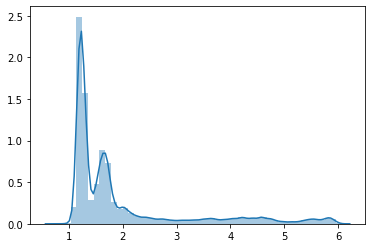

In [60]:
sns.distplot(catprediction)
plt.show()

In [61]:
catprediction.to_csv('catboostresult.csv')

**Result is 0.5490**